In [35]:
# supress warnings
import warnings
warnings.filterwarnings('ignore')

# Importing all required packages
import numpy as np
import pandas as pd

# Data viz lib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks
import numpy as np

In [36]:
#Read data
attr = pd.read_csv('HR+attrition.csv')
attr.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,Employed,admin,6,0,4,0,high,5
1,Employed,admin,4,0,3,0,medium,6
2,Employed,admin,6,0,2,0,medium,2
3,Employed,admin,2,1,4,0,medium,3
4,Employed,admin,5,0,4,0,medium,3


In [37]:
# Importing Categorical Columns
attr_cust = attr[['Attrition_status', 'department', 'satisfaction', 'filed_complaint', 'projects', 'recently_promoted', 'salary', 'tenure']]
attr_cust.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,Employed,admin,6,0,4,0,high,5
1,Employed,admin,4,0,3,0,medium,6
2,Employed,admin,6,0,2,0,medium,2
3,Employed,admin,2,1,4,0,medium,3
4,Employed,admin,5,0,4,0,medium,3


In [38]:
# Converting satisfaction into categorical variable.
attr_cust['satisfaction'] = attr_cust['satisfaction'].astype('object',copy=False)

In [39]:
attr_cust.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,Employed,admin,6,0,4,0,high,5
1,Employed,admin,4,0,3,0,medium,6
2,Employed,admin,6,0,2,0,medium,2
3,Employed,admin,2,1,4,0,medium,3
4,Employed,admin,5,0,4,0,medium,3


In [40]:
attr_cust.shape

(12075, 8)

In [41]:
attr_cust.describe()

,filed_complaint,projects,recently_promoted,tenure
count,12075.000000,12075.000000,12075.000000,12075.000000
mean,0.143188,3.846377,0.021035,3.593292
std,0.350279,1.248489,0.143508,1.515632
min,0.000000,2.000000,0.000000,2.000000
25%,0.000000,3.000000,0.000000,3.000000
50%,0.000000,4.000000,0.000000,3.000000
75%,0.000000,5.000000,0.000000,4.000000
max,1.000000,7.000000,1.000000,10.000000


In [42]:
attr_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12075 entries, 0 to 12074
Data columns (total 8 columns):
Attrition_status     12075 non-null object
department           12075 non-null object
satisfaction         12075 non-null object
filed_complaint      12075 non-null int64
projects             12075 non-null int64
recently_promoted    12075 non-null int64
salary               12075 non-null object
tenure               12075 non-null int64
dtypes: int64(4), object(4)
memory usage: 754.8+ KB


In [43]:
# First we will keep a copy of data
attr_cust_copy = attr_cust.copy()

In [44]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
attr_cust = attr_cust.apply(le.fit_transform)
attr_cust.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
0,0,1,5,0,2,0,0,3
1,0,1,3,0,1,0,2,4
2,0,1,5,0,0,0,2,0
3,0,1,1,1,2,0,2,1
4,0,1,4,0,2,0,2,1


In [45]:
attr_cust.describe()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure
count,12075.000000,12075.000000,12075.00000,12075.000000,12075.000000,12075.000000,12075.000000,12075.000000
mean,0.244306,5.364638,5.65648,0.143188,1.846377,0.021035,1.352381,1.576729
std,0.429693,3.176513,2.53805,0.350279,1.248489,0.143508,0.623621,1.449545
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,4.00000,0.000000,1.000000,0.000000,1.000000,1.000000
50%,0.000000,7.000000,6.00000,0.000000,2.000000,0.000000,1.000000,1.000000
75%,0.000000,8.000000,8.00000,0.000000,3.000000,0.000000,2.000000,2.000000
max,1.000000,9.000000,9.00000,1.000000,5.000000,1.000000,2.000000,7.000000


In [46]:
import sys
!{sys.executable} -m pip install kmodes

## Using KModes Clustering on the data
### Hint: KModes(n_clusters= "Number of clusters", init = "Cao", n_init = 1, verbose=1)

In [47]:
# Importing Libraries

from kmodes.kmodes import KModes
km_cao = KModes(n_clusters=3,init='Cao',n_init=1,verbose=1)
fitClusters_cao = km_cao.fit_predict(attr_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 450, cost: 37904.0


In [48]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(attr_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 45722.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 41503.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 450, cost: 37904.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1287, cost: 34853.0
Run 1, iteration: 2/100, moves: 1588, cost: 34853.0


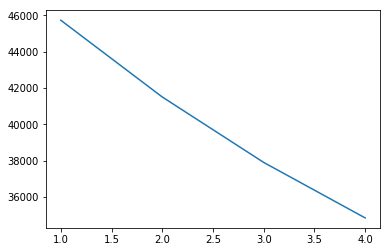

In [49]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

In [50]:
attr_cust1 = attr_cust_copy.reset_index()
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([attr_cust1, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)
combinedDf.head()

,Attrition_status,department,satisfaction,filed_complaint,projects,recently_promoted,salary,tenure,cluster_predicted
0,Employed,admin,6,0,4,0,high,5,0
1,Employed,admin,4,0,3,0,medium,6,1
2,Employed,admin,6,0,2,0,medium,2,2
3,Employed,admin,2,1,4,0,medium,3,0
4,Employed,admin,5,0,4,0,medium,3,0


In [51]:
# determining the name of the file 
file_name = 'attrition_solution.xlsx'

In [52]:
# saving the excel 
combinedDf.to_excel(file_name,index=False) 
print('DataFrame is written to Excel File successfully.')

DataFrame is written to Excel File successfully.


In [53]:
attr_cust["Attrition_status"] = attr_cust.Attrition_status.replace({0: "Employed", 1: "Left"})
attr_cust["department"] = attr_cust.department.replace({0: "admin", 1: "engineering",2: "finance",3: "IT",4: "management",5: "marketing",6: "product",7: "sales",8: "support"})
attr_cust["salary"] = attr_cust.salary.replace({0: "high", 1: "medium",2: "low"})

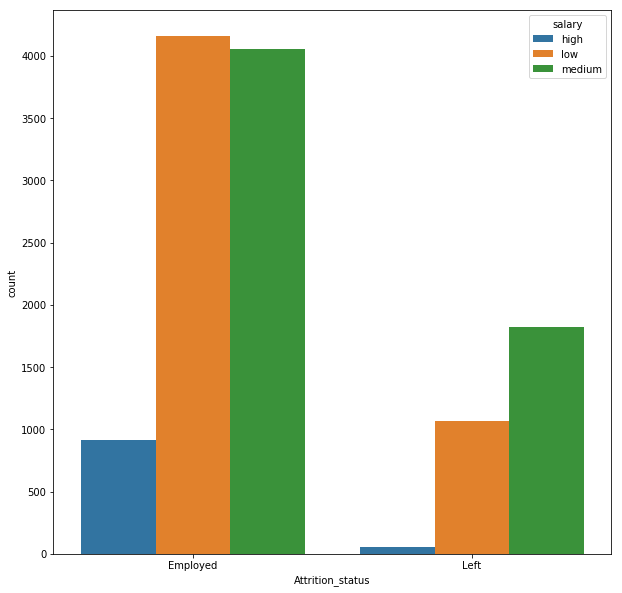

In [54]:
plt.figure(figsize=(10, 10))
g = sns.countplot(x='Attrition_status', hue='salary', data=attr_cust)

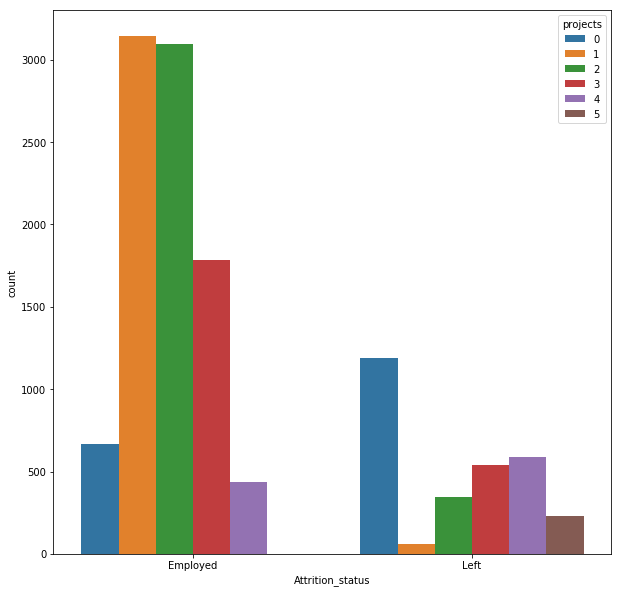

In [55]:
plt.figure(figsize=(10, 10))
g = sns.countplot(x='Attrition_status', hue='projects', data=attr_cust)

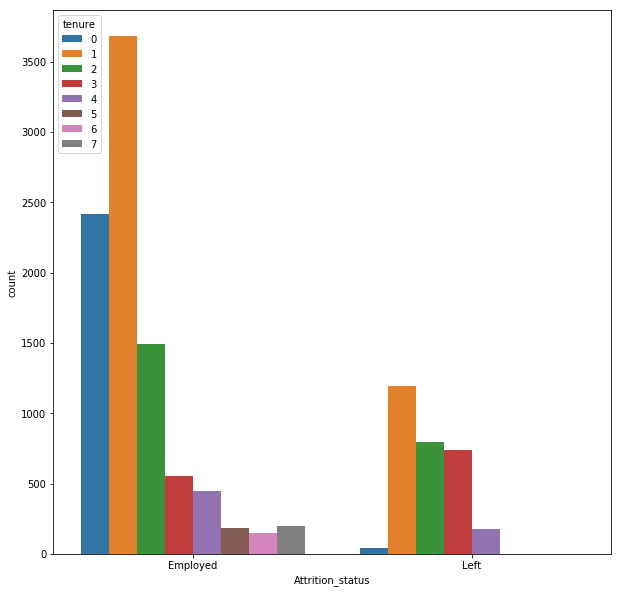

In [56]:
plt.figure(figsize=(10, 10))
g = sns.countplot(x='Attrition_status', hue='tenure', data=attr_cust)

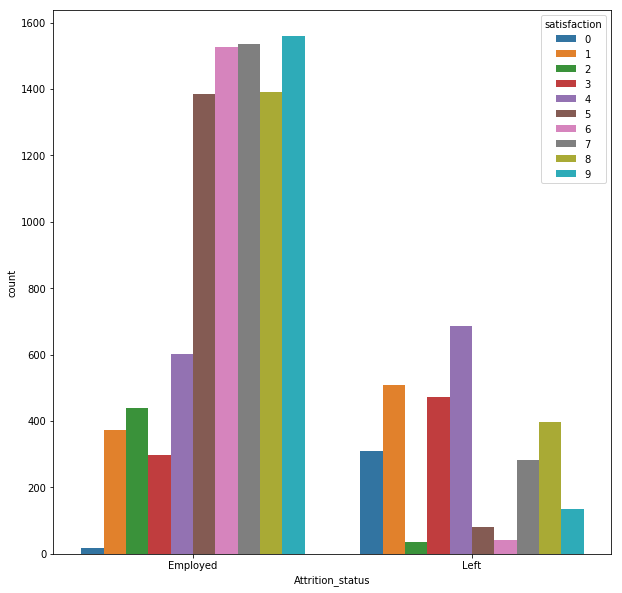

In [57]:
plt.figure(figsize=(10, 10))
g = sns.countplot(x='Attrition_status', hue='satisfaction', data=attr_cust)

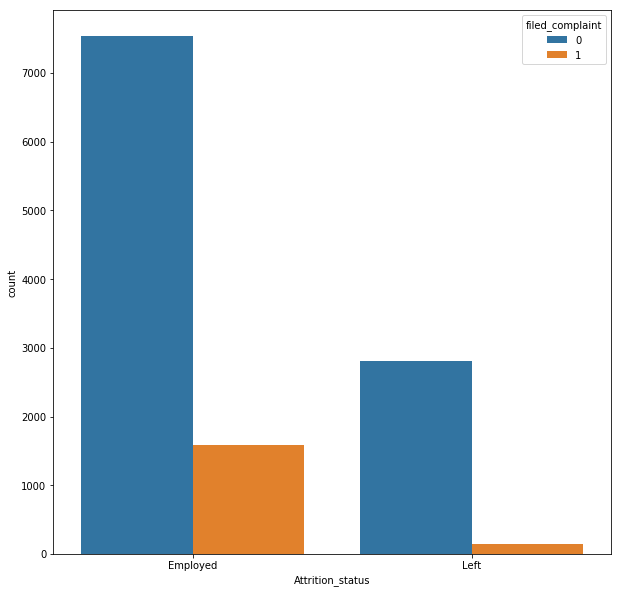

In [58]:
plt.figure(figsize=(10, 10))
g = sns.countplot(x='Attrition_status', hue='filed_complaint', data=attr_cust)

In [62]:
writer = pd.ExcelWriter('submission.xlsx', engine='xlsxwriter')
attr_cust.to_excel(writer, sheet_name='Sheet1')

workbook = writer.book
worksheet = writer.sheets['Sheet1']

chart = workbook.add_chart({'type': 'column'})